In [40]:
import pandas as pd

In [41]:
import matplotlib.pyplot as plt

In [153]:
#해당 변수값들을 설정하면 해당 시간의 oversupply를 출력한다.
YEAR = 2034
SEASON = 0   #   0 : spring     1 : summer    2 : fall    3 : winter
DAY = 0   # 0 : weekday       1 : weekend
season = ['spring','summer','fall','winter']
day = ['weekday','winter']

In [128]:
demand = pd.read_csv("한국전력거래소_시간별 전력수요량_20211231.csv", encoding='CP949',index_col = '날짜', dayfirst=False,parse_dates=True)

In [129]:
name = {}
for i in range(24):
    name['{}시'.format(i+1)] = i+1

demand = demand.rename(
    columns = name
)

In [130]:
renewable = pd.read_csv("한국전력거래소_시간별 신재생에너지 거래량_20220331.csv", encoding='CP949',index_col = 0 ,parse_dates=True)

In [131]:
renewable['태양광+풍력'] = renewable['태양광']*3+renewable['풍력']

In [132]:
renewable = renewable.loc[renewable.index<='2021-12-31',['거래시간','태양광+풍력']]

In [133]:
a = renewable.sort_index().groupby(["거래시간"]).head(365)

In [134]:
final_renewable = a.pivot(columns = '거래시간', values = "태양광+풍력")

In [135]:
dm_2021 = demand + final_renewable

In [136]:
dm = [] #연도별, 계절별, 주말/평일별 수요 Table 저장
for year in range(2021,2035):
    final_dm = dm_2021 + dm_2021*((554798/517756)-1)*(year-2021)/13    #수요 증가 적용
    dm.append(
        [
            #weekday
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek<5)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek<5)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek<5)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek<5)]#winter
            ],
            #weekend
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek>4)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek>4)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek>4)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek>4)]#winter
            ]
        ]
    )

<AxesSubplot:title={'center':'2034 spring weekday demand graph'}, xlabel='Time'>

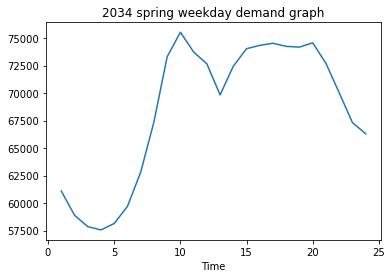

In [155]:
dm[YEAR-2021][DAY][SEASON].mean().plot(xlabel ='Time', title ='{} {} {} demand graph'.format(YEAR,season[SEASON],day[DAY]) )

In [138]:
supply = pd.read_csv("한국전력거래소_연료원별 전력거래량_20201231.csv",encoding='CP949',index_col = 0, dayfirst=False, parse_dates=True)

In [139]:
sup_dict = {
    "nuc" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='원자력')],
    "soft_coal" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='유연탄')],
    "hard_coal" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='무연탄')],
    "biogas" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='바이오가스')],
    "subgas" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='부생가스')],
    "solar" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='태양광')],
    "wind" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='풍력')],
    "small" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='소수력')],
    "hydro" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='수력')],
    "pump" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='양수')],
    "land" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='매립가스')],
    "bunker" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='중유')],
    "waste" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='폐기물')],
    "lng" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='LNG')],
    "fuelcell" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='연료전지')],
    "diesel" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='경유')],
    "gaspressure" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='가스압')],
    "ocean" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='해양에너지')],
    "biomass" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='바이오매스')],
    "etc" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='기타')]
}
sup_list = ['nuc', 'soft_coal', 'hard_coal', 'biogas', 'subgas', 'unknown','solar', 'wind', \
            'small', 'hydro', 'pump', 'land', 'bunker'\
           , 'waste', 'lng', 'fuelcell', 'diesel', 'gaspressure', 'ocean', 'biomass', 'etc']
# sup_index = 

# coal = hard_coal.add(soft_coal)
# coal['거래시간'] = (coal['거래시간']/2).astype(int)
# coal['연료원'] = 'coal'

In [140]:
for key in sup_dict.keys():
    temp = sup_dict[key].sort_index().groupby(["거래시간"]).head(365)
    sup_dict[key] = temp.pivot(columns = '거래시간', values = "전력거래량(MWh)")

In [141]:
sup_dict['solar']*=3 # 여기서 *3 은 (ppa + 자가용발전)의 예측값

In [142]:
#공급 증가율 적용
rate = {}
for key in sup_list:
    if (key == 'soft_coal') or (key == 'hard_coal'):
        rate[key] = 28.3/35.3
    elif key == 'lng':
        rate[key] = 59.1/41.3
    elif key == 'solar':
        rate[key] = 10.8/3.7 
    elif key == 'pump':
        rate[key] = 6.5/4.7
    else:
        rate[key] = 1

In [143]:
fin_sup=[]

for year in range(2021,2035):
    i = year-2021
    fin_sup.append([  [ [],[],[],[] ], [ [],[],[],[] ]  ])
    for key in sup_dict.keys(): 
        x = sup_dict[key] + sup_dict[key]*(rate[key]-1)*(year-2020)/14 #연도별 공급증가율 적용
        #weekday                
        fin_sup[i][0][0].append(x[((x.index>='2020-03-01')&(x.index<'2020-06-01'))&(x.index.dayofweek<5)].mean())#spring
        fin_sup[i][0][1].append(x[((x.index>='2020-06-01')&(x.index<'2020-09-01'))&(x.index.dayofweek<5)].mean())#summer
        fin_sup[i][0][2].append(x[((x.index>='2020-09-01')&(x.index<'2020-12-01'))&(x.index.dayofweek<5)].mean())#fall
        fin_sup[i][0][3].append(x[((x.index<'2020-03-01')|('2020-11-30'<x.index))&(x.index.dayofweek<5)].mean())#winter                
        #weekend                
        fin_sup[i][1][0].append(x[((x.index>='2020-03-01')&(x.index<'2020-06-01'))&(x.index.dayofweek>4)].mean())#spring
        fin_sup[i][1][1].append(x[((x.index>='2020-06-01')&(x.index<'2020-09-01'))&(x.index.dayofweek>4)].mean())#summer
        fin_sup[i][1][2].append(x[((x.index>='2020-09-01')&(x.index<'2020-12-01'))&(x.index.dayofweek>4)].mean())#fall
        fin_sup[i][1][3].append(x[((x.index<'2020-03-01')|('2020-11-30'<x.index))&(x.index.dayofweek>4)].mean())#winter
    

In [144]:
#수요와 공급이 불일치한다. 공급이 더 적은 양으로 나타난다. 아마 누락된 공급량 통계가 있을 것이라고 생각했다.
#누락된 공급에너지를 unknown으로 저장하였다.
#그리고 이 unknown 공급 에너지가 수요의 증가량만큼 늘어난다고 가정하여 각 년도에 더해주었다.

sup_sum_list = [[],[]]
for i in range(2):
    for j in range(4):
        sup_sum = fin_sup[0][i][j][0]
        for k in range(1,len(fin_sup[0][i][j])):
            sup_sum = sup_sum + fin_sup[0][i][j][k]
        sup_sum_list[i].append(sup_sum)

unknown_sup = [[],[]]
for i in range(2):
    for j in range(4):
        unknown_sup[i].append(dm[0][i][j].mean() - sup_sum_list[i][j])

In [145]:
for i in range(0,14):
    #weekday                
    fin_sup[i][0][0].insert(5,unknown_sup[0][0])#spring
    fin_sup[i][0][1].insert(5,unknown_sup[0][1])#summer
    fin_sup[i][0][2].insert(5,unknown_sup[0][2])#fall
    fin_sup[i][0][3].insert(5,unknown_sup[0][3])#winter                
    #weekend                
    fin_sup[i][1][0].insert(5,unknown_sup[1][0])#spring
    fin_sup[i][1][1].insert(5,unknown_sup[1][1])#summer
    fin_sup[i][1][2].insert(5,unknown_sup[1][2])#fall
    fin_sup[i][1][3].insert(5,unknown_sup[1][3])#winter           

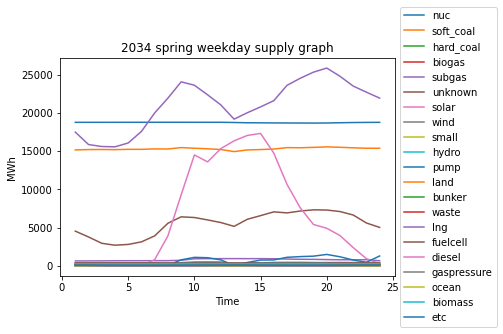

In [156]:
b = pd.DataFrame(fin_sup[YEAR-2021][DAY][SEASON])
g = b.T

sup_column = {}
for i, source in enumerate(sup_list):
    sup_column[i] = source

g = g.rename(columns = sup_column)
g.plot(xlabel = 'Time',ylabel = 'MWh',title = '{} {} {} supply graph'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Mwh')

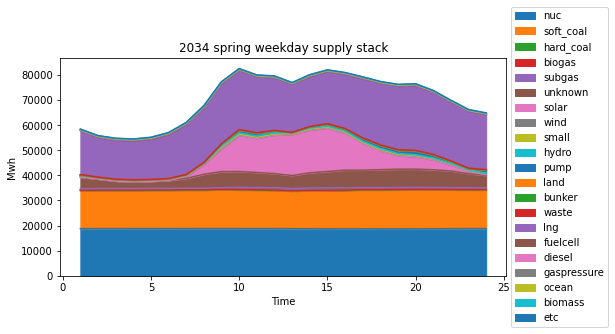

In [154]:
fig, axs = plt.subplots(figsize=(8, 4))  
g.plot.area(ax=axs, xlabel = 'Time',title= '{} {} {} supply stack'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axs.set_ylabel("Mwh")

In [149]:
up_to_wind = fin_sup[YEAR-2021][DAY][SEASON][0]
for i in range(1,8):
    up_to_wind = up_to_wind + fin_sup[YEAR-2021][DAY][SEASON][i]

In [150]:
diff = dm[YEAR-2021][DAY][SEASON].mean()-up_to_wind

In [151]:
oversupply = 0
for i in diff:
    if i<0:
        oversupply -= i
print('oversupply=', oversupply)

0
